In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:

# importing libraries for KNN

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate



In [3]:
df = pd.read_csv("train.csv")

In [4]:
#Handling Embarked feature by replace the missing values with the most common value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [5]:
#Handling Cabin feature by making a new featur "Deck" taking the fist letter and replace the missing values with 'N'

df['Deck']=df["Cabin"]
df['Deck']=df["Deck"].str.slice(0,1)
df['Deck']=df["Deck"].fillna("N")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [6]:
#change the 'sex' , 'Embarked' , 'Deck' to numbers
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

df.Deck.replace(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [1, 2, 3,4,5,6,7,8,9], inplace=True)



In [7]:
##not for this session
#First method of age
#use sklearn to applay the Linear Regression to predict the missing values of the age
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
data_with_null=df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]
data_without_null=data_with_null.dropna()
train=data_without_null.iloc[:,:7]
target=data_without_null.iloc[:,7]
lin.fit(train,target)
test=data_with_null.iloc[:,:7]
pridect_Age=pd.DataFrame(lin.predict(test))

data_with_null.Age.fillna(pridect_Age[0] ,inplace=True)

df['pridect_Age']=data_with_null.Age.astype(int)


In [8]:
##not for this session
#Second method of age
#use sklearn to applay the KNNImputer to predict the missing values of the age
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df_filled=pd.DataFrame(imputer.fit_transform(df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]),)
df['KNN_pridect_Age']=df_filled[7].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,pridect_Age,KNN_pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38,38
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35,35
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27,27
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19,19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1,1,23,33
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26,26


In [9]:
##not for this session
#Third method of age

#Extract the titles of name to calculate the mean age of each title
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [10]:
##not for this session
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
df['Title'] = df['Title'].map(title_reduction)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [11]:
##not for this session
#replacing NaN with the mean value of each title
for title, age in df.groupby('Title')['Age'].mean().iteritems():
    print(title, age)
    df.loc[(df['Title']==title) & (df['Age'].isnull()), 'Age'] = age

df.isnull().sum()

Dr 42.0
Master 4.574166666666667
Miss 21.86
Mr 32.74014778325123
Mrs 35.981818181818184
Rev 43.166666666666664


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Deck                 0
pridect_Age          0
KNN_pridect_Age      0
Title                0
dtype: int64

In [12]:
df['Age']=df['Age'].astype(int)


In [13]:
df.drop(['Name','Ticket','Cabin','Title'] ,axis=1 , inplace=True)

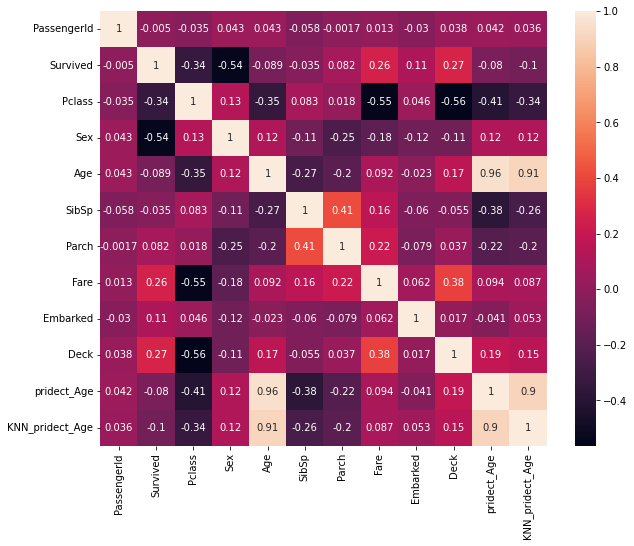

In [14]:
#session start
#Finding correlations to determine the necessary features by heatmap
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [15]:
#First : Age by the mean value of title

In [16]:
#determine the necessary features 
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']

#split dataset by 0.25 for test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [17]:
#Logistic Regression

LR=LogisticRegression().fit(X_train,y_train)

In [18]:
y_predict=LR.predict(X_test)

In [19]:
con_mat=confusion_matrix(y_test,y_predict)

In [20]:
con_mat=pd.DataFrame(con_mat,columns=['predicted No','predicted Yes'],index=['actual No','actual Yes'])

In [21]:
print(con_mat)

            predicted No  predicted Yes
actual No            121             15
actual Yes            31             56


In [22]:
score=accuracy_score(y_predict,y_test)

In [23]:
print(score)

0.7937219730941704


In [24]:
#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)
    




 CV accuracy for k=1 is 72

 CV accuracy for k=2 is 70

 CV accuracy for k=3 is 70

 CV accuracy for k=4 is 70

 CV accuracy for k=5 is 70

 CV accuracy for k=6 is 68

 CV accuracy for k=7 is 70

 CV accuracy for k=8 is 68

 CV accuracy for k=9 is 67

 CV accuracy for k=10 is 66

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 70

 CV accuracy for k=13 is 71

 CV accuracy for k=14 is 71

 CV accuracy for k=15 is 72

 CV accuracy for k=16 is 72

 CV accuracy for k=17 is 72

 CV accuracy for k=18 is 71

 CV accuracy for k=19 is 69
0


In [25]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
score

[[117  19]
 [ 30  57]]


0.7937219730941704

In [26]:
##Second Age by Linear Regression

In [27]:

X=df[['Pclass', 'Sex', 'pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
#Logistic Regression

LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)


In [28]:

score=accuracy_score(y_predict,y_test)
print(con_mat)
print(score)

            predicted No  predicted Yes
actual No            121             15
actual Yes            31             56
0.8340807174887892


In [29]:
#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)
    




 CV accuracy for k=1 is 70

 CV accuracy for k=2 is 69

 CV accuracy for k=3 is 72

 CV accuracy for k=4 is 66

 CV accuracy for k=5 is 71

 CV accuracy for k=6 is 69

 CV accuracy for k=7 is 69

 CV accuracy for k=8 is 70

 CV accuracy for k=9 is 73

 CV accuracy for k=10 is 69

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 70

 CV accuracy for k=13 is 73

 CV accuracy for k=14 is 73

 CV accuracy for k=15 is 74

 CV accuracy for k=16 is 74

 CV accuracy for k=17 is 74

 CV accuracy for k=18 is 73

 CV accuracy for k=19 is 74
14


In [30]:
#LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
score

[[126  18]
 [ 23  56]]


0.8340807174887892

In [31]:
##Third :  KNN

In [32]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

#Logistic Regression
LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
score=accuracy_score(y_predict,y_test)
print(con_mat)
print(score)

            predicted No  predicted Yes
actual No            121             15
actual Yes            31             56
0.7892376681614349


In [33]:
#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)
    




 CV accuracy for k=1 is 72

 CV accuracy for k=2 is 64

 CV accuracy for k=3 is 70

 CV accuracy for k=4 is 69

 CV accuracy for k=5 is 69

 CV accuracy for k=6 is 69

 CV accuracy for k=7 is 68

 CV accuracy for k=8 is 68

 CV accuracy for k=9 is 68

 CV accuracy for k=10 is 67

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 69

 CV accuracy for k=13 is 69

 CV accuracy for k=14 is 69

 CV accuracy for k=15 is 69

 CV accuracy for k=16 is 69

 CV accuracy for k=17 is 70

 CV accuracy for k=18 is 68

 CV accuracy for k=19 is 69
0


In [34]:
#LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
score

[[114  17]
 [ 29  63]]


0.7892376681614349

In [35]:
#The best model is Logistic Regression with prdecting Age with KNN

#  Workhsop 3

In [104]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
x1= df[['Pclass', 'Sex', 'KNN_pridect_Age']]
x2 = df[['SibSp', 'Parch','Fare']]
x3 =df[[ 'Sex', 'Embarked' ,'Deck']]

y=df['Survived']

In [37]:
#Split

0.7985074626865671
Confusion_matrix for x1:             predicted No  predicted Yes
actual No            121             15
actual Yes            31             56
0.664179104477612
Confusion_matrix for x2:             predicted No  predicted Yes
actual No            121             15
actual Yes            31             56
0.7686567164179104
Confusion_matrix for x3:             predicted No  predicted Yes
actual No            121             15
actual Yes            31             56
{'x1': 0.7985074626865671, 'x2': 0.664179104477612, 'x3': 0.7686567164179104}


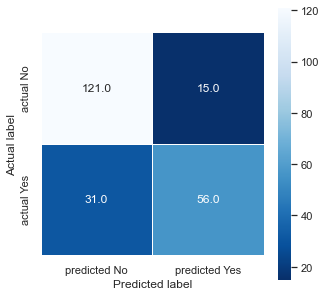

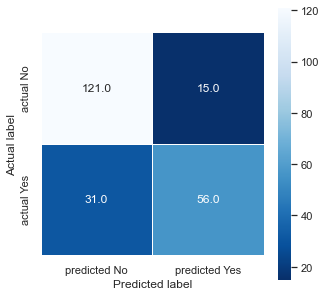

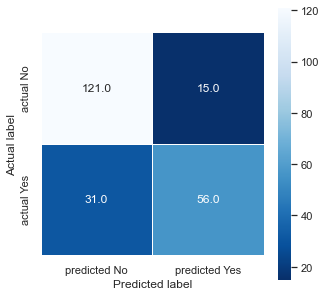

In [116]:
fList=[x1,x2,x3]
ls = ['x1','x2','x3']
count = 0
acc_dict={}
for i in fList:
    X_train,X_test,y_train,y_test=train_test_split(i,y,test_size=0.3)
    #Logistic Regression
   
    LR=LogisticRegression().fit(X_train,y_train)
    y_predict=LR.predict(X_test)
    s=accuracy_score(y_predict,y_test)
    acc_dict[ls[count]]=s
    print(s)
    print("Confusion_matrix for {}:".format(ls[count]), con_mat)
    count+=1
    plt.figure(figsize=(5,5))
    sns.heatmap(con_mat, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    
print(acc_dict)

In [ ]:
fList=[x1,x2,x3]
ls = ['x1','x2','x3']
count = 0
acc_dict={}
for i in fList:
    X_train,X_test,y_train,y_test=train_test_split(i,y,test_size=0.3)
    final_scores = []
    for i in range(1,20,1):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        score=cross_val_score(knn,X_train,y_train,cv=5)
        print("Score:",score)
        acc = accuracy_score(y_test, pred, normalize=True) * float(100)
        final_scores.append(acc)
        print('\n CV accuracy for k=%d is %d'%(i,acc))
    optimal_k = final_scores.index(max(final_scores))
    print(optimal_k+1)   
7
    
print(acc_dict)

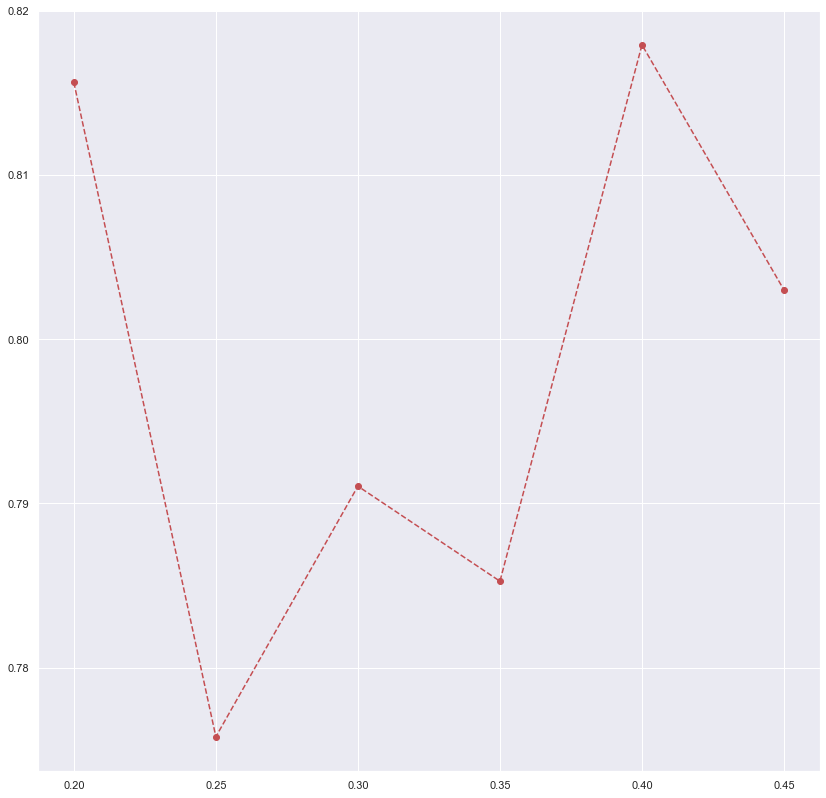

In [117]:
keys = accuracy_dict.keys()
values = accuracy_dict.values()

plt.plot(keys, values, linestyle='--', marker='o', color='r', label='line with marker')

In [93]:
hritikas_dictionary = {}
for i in np.arange(0.2,0.31,0.05):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)
    print(i)
    #print("Test sample size: ", i)
    #print("\n")
    final_scores = []
    for j in range(1,20,1):
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        acc = accuracy_score(y_test, pred, normalize=True) * float(100)
        final_scores.append(acc)
        print('\n CV accuracy for k=%d is %d'%(j,acc))
    optimal_k = final_scores.index(max(final_scores))
    print(optimal_k+1,max(final_scores), "\n") 
    hritikas_dictionary[i] = final_scores
    
hritikas_dictionary
    

0.2

 CV accuracy for k=1 is 66

 CV accuracy for k=2 is 68

 CV accuracy for k=3 is 69

 CV accuracy for k=4 is 69

 CV accuracy for k=5 is 68

 CV accuracy for k=6 is 70

 CV accuracy for k=7 is 70

 CV accuracy for k=8 is 73

 CV accuracy for k=9 is 73

 CV accuracy for k=10 is 70

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 68

 CV accuracy for k=13 is 68

 CV accuracy for k=14 is 68

 CV accuracy for k=15 is 67

 CV accuracy for k=16 is 68

 CV accuracy for k=17 is 68

 CV accuracy for k=18 is 68

 CV accuracy for k=19 is 68
8 73.18435754189943 

0.25

 CV accuracy for k=1 is 66

 CV accuracy for k=2 is 65

 CV accuracy for k=3 is 69

 CV accuracy for k=4 is 68

 CV accuracy for k=5 is 69

 CV accuracy for k=6 is 66

 CV accuracy for k=7 is 67

 CV accuracy for k=8 is 67

 CV accuracy for k=9 is 66

 CV accuracy for k=10 is 65

 CV accuracy for k=11 is 68

 CV accuracy for k=12 is 67

 CV accuracy for k=13 is 67

 CV accuracy for k=14 is 67

 CV accuracy for k=15 is 66



{0.2: [66.4804469273743,
  68.71508379888269,
  69.27374301675978,
  69.27374301675978,
  68.71508379888269,
  70.39106145251397,
  70.94972067039106,
  73.18435754189943,
  73.18435754189943,
  70.39106145251397,
  69.83240223463687,
  68.71508379888269,
  68.15642458100558,
  68.71508379888269,
  67.59776536312849,
  68.71508379888269,
  68.71508379888269,
  68.15642458100558,
  68.15642458100558],
 0.25: [66.81614349775785,
  65.91928251121077,
  69.05829596412556,
  68.16143497757847,
  69.50672645739911,
  66.3677130044843,
  67.71300448430493,
  67.2645739910314,
  66.81614349775785,
  65.02242152466367,
  68.60986547085201,
  67.71300448430493,
  67.2645739910314,
  67.71300448430493,
  66.81614349775785,
  67.71300448430493,
  67.2645739910314,
  69.05829596412556,
  69.05829596412556],
 0.3: [69.77611940298507,
  67.91044776119402,
  68.65671641791045,
  68.65671641791045,
  72.76119402985076,
  71.26865671641791,
  71.64179104477611,
  72.01492537313433,
  69.02985074626866,


In [ ]:
sns.lineplot(data = hritikas_dictionary, x = values, y =  hue = index)

In [51]:
#Logistic Regression

LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
s=accuracy_score(y_predict,y_test)
score=cross_val_score(LR,X_train,y_train,cv=5)
con_mat=confusion_matrix(y_test,y_predict)

print('Score mean:' ,score.mean())
print("Accuracy score: ", s)
print("Score:",score)
print("Confusion_matrix:", con_mat)

Score mean: 0.7903265626753451
Accuracy score:  0.820627802690583
Score: [0.85074627 0.76119403 0.82089552 0.78195489 0.73684211]
Confusion_matrix: [[134  18]
 [ 22  49]]


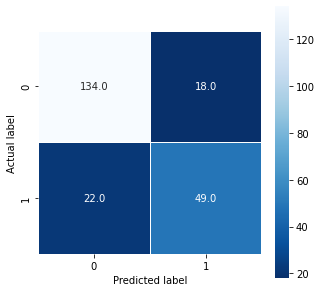

In [52]:
plt.figure(figsize=(5,5))
sns.heatmap(con_mat, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [41]:
# KNN

#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score=cross_val_score(knn,X_train,y_train,cv=5)
    print("Score:",score)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k+1)   

Score: [0.75373134 0.65671642 0.64925373 0.67669173 0.7518797 ]

 CV accuracy for k=1 is 69
Score: [0.73134328 0.69402985 0.67910448 0.69924812 0.71428571]

 CV accuracy for k=2 is 69
Score: [0.74626866 0.67164179 0.67910448 0.69924812 0.7518797 ]

 CV accuracy for k=3 is 67
Score: [0.71641791 0.70149254 0.70895522 0.68421053 0.72180451]

 CV accuracy for k=4 is 69
Score: [0.76119403 0.67910448 0.70149254 0.67669173 0.7518797 ]

 CV accuracy for k=5 is 70
Score: [0.70149254 0.67164179 0.7238806  0.72180451 0.73684211]

 CV accuracy for k=6 is 72
Score: [0.74626866 0.67164179 0.71641791 0.66917293 0.7518797 ]

 CV accuracy for k=7 is 69
Score: [0.70149254 0.61940299 0.73134328 0.67669173 0.72180451]

 CV accuracy for k=8 is 69
Score: [0.74626866 0.59701493 0.7238806  0.64661654 0.77443609]

 CV accuracy for k=9 is 72
Score: [0.70895522 0.58955224 0.74626866 0.69172932 0.77443609]

 CV accuracy for k=10 is 70
Score: [0.73134328 0.60447761 0.75373134 0.68421053 0.78195489]

 CV accuracy f

In [40]:
def model_score(key):
    print(key)


    x = df.iloc[:, 1:]
    if(len(key) > 0):
        x = x.drop(columns=[key])
        x = x.values
        
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


    # k-value
    error_rate=[]
    for i in range (1,31):
        clf=KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train,y_train.ravel())
        predict_i=clf.predict(x_test)
        error_rate.append(1 - accuracy_score(y_test, predict_i))
    k_value = error_rate.index(min(error_rate)) + 1


    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k_value)))



    dict = {}
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
        dict[name] = [cv_results.mean(), cv_results.std()]

    return dict

In [54]:
results = {}

In [55]:
for key in df.columns[2:]:
    results[key] = pd.DataFrame(model_score(key))

Pclass
Sex
Age
SibSp
Parch
Fare
Embarked
Deck
pridect_Age
KNN_pridect_Age


In [56]:
results

{'Pclass':          LR       LDA       KNN
 0  0.998387  0.815213  0.725458
 1  0.003226  0.054688  0.031599,
 'Sex':     LR       LDA       KNN
 0  1.0  0.743226  0.770490
 1  0.0  0.041441  0.044124,
 'Age':     LR       LDA       KNN
 0  1.0  0.802568  0.722232
 1  0.0  0.031848  0.039032,
 'SibSp':     LR       LDA       KNN
 0  1.0  0.789677  0.717523
 1  0.0  0.021611  0.017383,
 'Parch':     LR       LDA       KNN
 0  1.0  0.788077  0.694981
 1  0.0  0.023930  0.060822,
 'Fare':     LR       LDA       KNN
 0  1.0  0.797806  0.804219
 1  0.0  0.040372  0.023749,
 'Embarked':     LR       LDA       KNN
 0  1.0  0.807419  0.764000
 1  0.0  0.023989  0.022307,
 'Deck':     LR       LDA       KNN
 0  1.0  0.799394  0.712606
 1  0.0  0.021756  0.025385,
 'pridect_Age':     LR       LDA       KNN
 0  1.0  0.788052  0.751174
 1  0.0  0.041682  0.027045,
 'KNN_pridect_Age':     LR       LDA       KNN
 0  1.0  0.791355  0.770400
 1  0.0  0.037444  0.023105}

In [57]:
full_dataset_result = pd.DataFrame(model_score(''))
full_dataset_result

,LR,LDA,KNN
0,1.0,0.788129,0.722374
1,0.0,0.053730,0.026923


In [58]:
margins = {}

In [59]:
for key, res in results.items():
    tmp_dict = {}
    for model in res.columns:
        tmp_dict[model] = []
        tmp_dict[model].append(res[model][0] - full_dataset_result[model][0])
        tmp_dict[model].append(res[model][1] - full_dataset_result[model][1])

    margins[key] = pd.DataFrame(tmp_dict)

In [60]:
margins['SibSp']

,LR,LDA,KNN
0,0.0,0.001548,-0.004852
1,0.0,-0.032119,-0.009540


In [61]:
margins

margins_means = {}

for key, res in margins.items():
    for col in res.columns:
        margins_means[col] = {}
        for key2, res2 in margins.items():
            margins_means[col][key2] = margins[key2][col][0]

In [62]:
for model, res in margins_means.items():
    minimum = min(res, key=res.get)
    print(model, ':',minimum, '(',res[minimum], ')')

LR : Pclass ( -0.001612903225806428 )
LDA : Sex ( -0.04490322580645156 )
KNN : Parch ( -0.027393548387096733 )


In [63]:
margins['Pclass']

,LR,LDA,KNN
0,-0.001613,0.027084,0.003084
1,0.003226,0.000958,0.004676


In [64]:
margins['Sex']

,LR,LDA,KNN
0,0.0,-0.044903,0.048116
1,0.0,-0.012289,0.017201


In [65]:
margins['Parch']

,LR,LDA,KNN
0,0.0,-0.000052,-0.027394
1,0.0,-0.029800,0.033899


In [ ]:
fig = plt.figure(figsize=(6, 4), dpi=80)
fig.suptitle('Comparison')
ax = fig.add_subplot(111)
plt.boxplot(margins_df)
ax.set_xticklabels(margins_df.columns)
plt.ylabel('Margins')
plt.show()

In [69]:
results

{'Pclass':          LR       LDA       KNN
 0  0.998387  0.815213  0.725458
 1  0.003226  0.054688  0.031599,
 'Sex':     LR       LDA       KNN
 0  1.0  0.743226  0.770490
 1  0.0  0.041441  0.044124,
 'Age':     LR       LDA       KNN
 0  1.0  0.802568  0.722232
 1  0.0  0.031848  0.039032,
 'SibSp':     LR       LDA       KNN
 0  1.0  0.789677  0.717523
 1  0.0  0.021611  0.017383,
 'Parch':     LR       LDA       KNN
 0  1.0  0.788077  0.694981
 1  0.0  0.023930  0.060822,
 'Fare':     LR       LDA       KNN
 0  1.0  0.797806  0.804219
 1  0.0  0.040372  0.023749,
 'Embarked':     LR       LDA       KNN
 0  1.0  0.807419  0.764000
 1  0.0  0.023989  0.022307,
 'Deck':     LR       LDA       KNN
 0  1.0  0.799394  0.712606
 1  0.0  0.021756  0.025385,
 'pridect_Age':     LR       LDA       KNN
 0  1.0  0.788052  0.751174
 1  0.0  0.041682  0.027045,
 'KNN_pridect_Age':     LR       LDA       KNN
 0  1.0  0.791355  0.770400
 1  0.0  0.037444  0.023105}

In [79]:
margins_means = {}


In [80]:

for key, res in margins.items():
    for col in res.columns:
        margins_means[col] = {}
        for key2, res2 in margins.items():
            margins_means[col][key2] = margins[key2][col][0]
            
            
for model, res in margins_means.items():
    minimum = min(res, key=res.get)
    print(model, ':',minimum, '(',res[minimum], ')')

LR : Pclass ( -0.001612903225806428 )
LDA : Sex ( -0.04490322580645156 )
KNN : Parch ( -0.027393548387096733 )


In [82]:
margins_df = pd.DataFrame(margins_means)

In [83]:
margins_df.index

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'pridect_Age', 'KNN_pridect_Age'],
      dtype='object')

'Comparison of margins in accuracy'

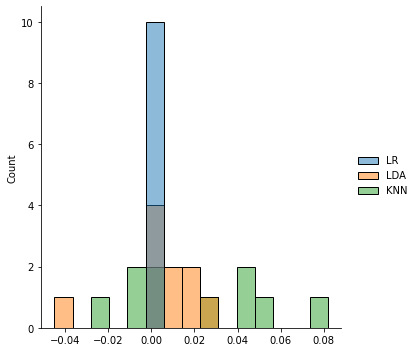

In [90]:
x = sns.displot(data = margins_df)
#Comparison of margins in accuracy

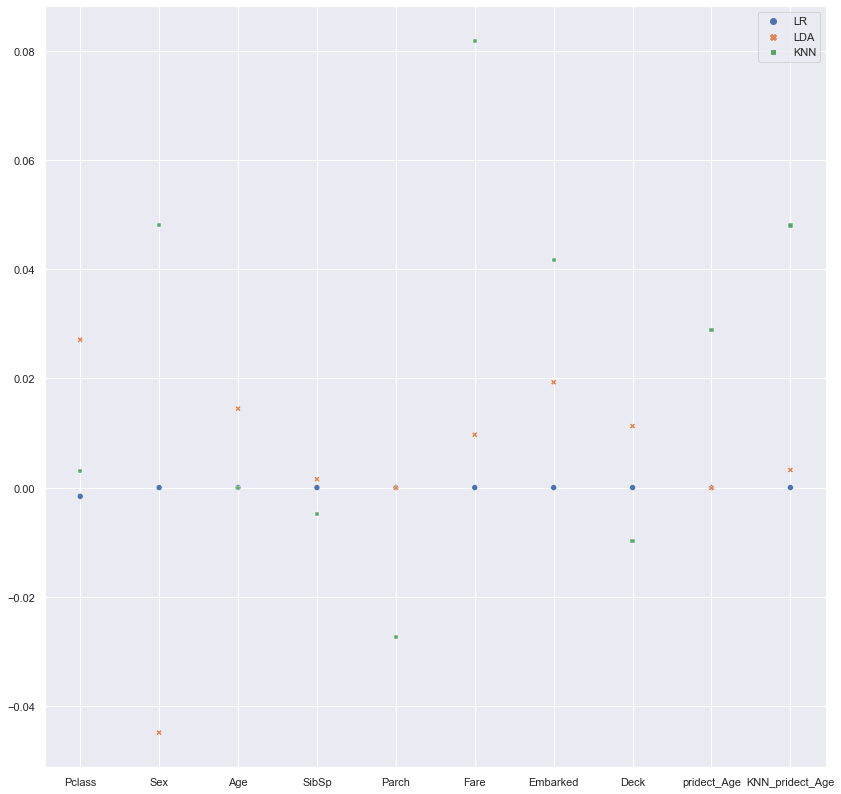

In [103]:
sns.set(rc = {'figure.figsize':(14,14)})
sns.scatterplot(data=margins_df)
plt.show()

<AxesSubplot:ylabel='KNN'>

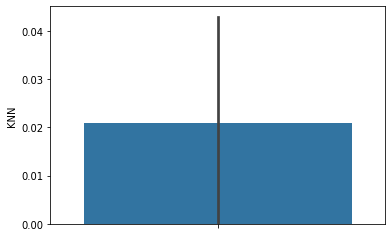

In [97]:
sns.barplot(data = margins_df, y = 'KNN')

<AxesSubplot:ylabel='LDA'>

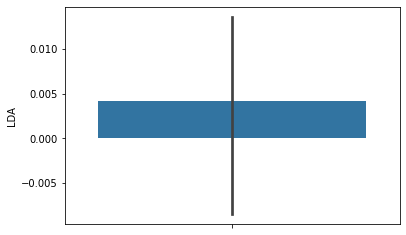

In [96]:
sns.barplot(data = margins_df, y = 'LDA')

In [86]:
margins_df

,LR,LDA,KNN
Pclass,-0.001613,0.027084,0.003084
Sex,0.000000,-0.044903,0.048116
Age,0.000000,0.014439,-0.000142
SibSp,0.000000,0.001548,-0.004852
Parch,0.000000,-0.000052,-0.027394
Fare,0.000000,0.009677,0.081845
Embarked,0.000000,0.019290,0.041626
Deck,0.000000,0.011265,-0.009768
pridect_Age,0.000000,-0.000077,0.028800
KNN_pridect_Age,0.000000,0.003226,0.048026
